## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  22.573947  1498.719780  0.734565  7.098551  1.552548
1  56.151037  1090.175265  0.520170  8.232892  1.513564
2  53.074974   390.454881  0.710468  8.023757  1.404510
3   4.154830  1282.564454  0.439582  8.531058  1.617482
4  36.948109   625.271523  0.113890  6.675819  1.006195


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9748375	total: 53.6ms	remaining: 53.5s
1:	learn: 0.9656798	total: 54.1ms	remaining: 27s
2:	learn: 0.9534692	total: 54.7ms	remaining: 18.2s
3:	learn: 0.9446711	total: 55.2ms	remaining: 13.7s
4:	learn: 0.9342443	total: 56.1ms	remaining: 11.2s
5:	learn: 0.9238645	total: 57ms	remaining: 9.45s
6:	learn: 0.9130213	total: 57.9ms	remaining: 8.21s
7:	learn: 0.9008191	total: 58.9ms	remaining: 7.31s
8:	learn: 0.8915196	total: 59.5ms	remaining: 6.55s
9:	learn: 0.8806231	total: 60.7ms	remaining: 6.01s
10:	learn: 0.8712074	total: 62.6ms	remaining: 5.62s
11:	learn: 0.8625881	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8544148	total: 66.4ms	remaining: 5.04s
13:	learn: 0.8466662	total: 66.9ms	remaining: 4.71s
14:	learn: 0.8374275	total: 67.6ms	remaining: 4.44s
15:	learn: 0.8271633	total: 68.6ms	remaining: 4.22s
16:	learn: 0.8172272	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8078562	total: 78.4ms	remaining: 4.28s
18:	learn: 0.8026145	total: 79.4ms	remaining: 4.

93:	learn: 0.4115951	total: 144ms	remaining: 1.39s
94:	learn: 0.4085546	total: 146ms	remaining: 1.39s
95:	learn: 0.4056139	total: 146ms	remaining: 1.38s
96:	learn: 0.4025397	total: 148ms	remaining: 1.38s
97:	learn: 0.3987574	total: 153ms	remaining: 1.41s
98:	learn: 0.3961305	total: 156ms	remaining: 1.42s
99:	learn: 0.3934138	total: 170ms	remaining: 1.53s
100:	learn: 0.3899226	total: 171ms	remaining: 1.52s
101:	learn: 0.3865292	total: 172ms	remaining: 1.51s
102:	learn: 0.3838779	total: 172ms	remaining: 1.5s
103:	learn: 0.3814513	total: 173ms	remaining: 1.49s
104:	learn: 0.3787699	total: 173ms	remaining: 1.48s
105:	learn: 0.3758103	total: 174ms	remaining: 1.46s
106:	learn: 0.3727734	total: 176ms	remaining: 1.47s
107:	learn: 0.3701960	total: 177ms	remaining: 1.46s
108:	learn: 0.3669934	total: 177ms	remaining: 1.45s
109:	learn: 0.3643146	total: 178ms	remaining: 1.44s
110:	learn: 0.3620901	total: 178ms	remaining: 1.43s
111:	learn: 0.3599814	total: 179ms	remaining: 1.42s
112:	learn: 0.357467

198:	learn: 0.2206634	total: 298ms	remaining: 1.2s
199:	learn: 0.2191276	total: 299ms	remaining: 1.19s
200:	learn: 0.2183455	total: 300ms	remaining: 1.19s
201:	learn: 0.2171457	total: 301ms	remaining: 1.19s
202:	learn: 0.2164464	total: 302ms	remaining: 1.19s
203:	learn: 0.2150637	total: 303ms	remaining: 1.18s
204:	learn: 0.2137623	total: 303ms	remaining: 1.18s
205:	learn: 0.2130052	total: 304ms	remaining: 1.17s
206:	learn: 0.2119258	total: 304ms	remaining: 1.17s
207:	learn: 0.2107949	total: 305ms	remaining: 1.16s
208:	learn: 0.2093397	total: 306ms	remaining: 1.16s
209:	learn: 0.2084600	total: 307ms	remaining: 1.15s
210:	learn: 0.2079688	total: 307ms	remaining: 1.15s
211:	learn: 0.2075018	total: 309ms	remaining: 1.15s
212:	learn: 0.2066971	total: 310ms	remaining: 1.14s
213:	learn: 0.2059092	total: 310ms	remaining: 1.14s
214:	learn: 0.2051735	total: 311ms	remaining: 1.14s
215:	learn: 0.2043130	total: 312ms	remaining: 1.13s
216:	learn: 0.2037853	total: 314ms	remaining: 1.13s
217:	learn: 0

428:	learn: 0.0932374	total: 438ms	remaining: 583ms
429:	learn: 0.0929445	total: 439ms	remaining: 582ms
430:	learn: 0.0924702	total: 440ms	remaining: 581ms
431:	learn: 0.0920085	total: 441ms	remaining: 579ms
432:	learn: 0.0915591	total: 441ms	remaining: 577ms
433:	learn: 0.0910844	total: 441ms	remaining: 576ms
434:	learn: 0.0906561	total: 442ms	remaining: 574ms
435:	learn: 0.0902342	total: 442ms	remaining: 572ms
436:	learn: 0.0896569	total: 443ms	remaining: 570ms
437:	learn: 0.0892466	total: 443ms	remaining: 569ms
438:	learn: 0.0888459	total: 443ms	remaining: 567ms
439:	learn: 0.0882882	total: 444ms	remaining: 566ms
440:	learn: 0.0879105	total: 445ms	remaining: 564ms
441:	learn: 0.0875230	total: 445ms	remaining: 562ms
442:	learn: 0.0871120	total: 446ms	remaining: 561ms
443:	learn: 0.0865717	total: 446ms	remaining: 559ms
444:	learn: 0.0862036	total: 446ms	remaining: 557ms
445:	learn: 0.0858345	total: 447ms	remaining: 555ms
446:	learn: 0.0853323	total: 447ms	remaining: 554ms
447:	learn: 

741:	learn: 0.0303915	total: 596ms	remaining: 207ms
742:	learn: 0.0302772	total: 597ms	remaining: 207ms
743:	learn: 0.0302314	total: 598ms	remaining: 206ms
744:	learn: 0.0301921	total: 598ms	remaining: 205ms
745:	learn: 0.0300812	total: 599ms	remaining: 204ms
746:	learn: 0.0299645	total: 600ms	remaining: 203ms
747:	learn: 0.0299201	total: 601ms	remaining: 202ms
748:	learn: 0.0298816	total: 602ms	remaining: 202ms
749:	learn: 0.0298435	total: 602ms	remaining: 201ms
750:	learn: 0.0298010	total: 603ms	remaining: 200ms
751:	learn: 0.0296826	total: 604ms	remaining: 199ms
752:	learn: 0.0295845	total: 606ms	remaining: 199ms
753:	learn: 0.0295130	total: 606ms	remaining: 198ms
754:	learn: 0.0294762	total: 607ms	remaining: 197ms
755:	learn: 0.0293387	total: 608ms	remaining: 196ms
756:	learn: 0.0291774	total: 609ms	remaining: 195ms
757:	learn: 0.0290201	total: 609ms	remaining: 195ms
758:	learn: 0.0288669	total: 610ms	remaining: 194ms
759:	learn: 0.0287151	total: 610ms	remaining: 193ms
760:	learn: 

896:	learn: 0.0171653	total: 756ms	remaining: 86.8ms
897:	learn: 0.0171007	total: 756ms	remaining: 85.9ms
898:	learn: 0.0170463	total: 760ms	remaining: 85.4ms
899:	learn: 0.0169745	total: 761ms	remaining: 84.6ms
900:	learn: 0.0169466	total: 762ms	remaining: 83.7ms
901:	learn: 0.0169190	total: 762ms	remaining: 82.8ms
902:	learn: 0.0168534	total: 763ms	remaining: 82ms
903:	learn: 0.0168261	total: 764ms	remaining: 81.2ms
904:	learn: 0.0167992	total: 765ms	remaining: 80.3ms
905:	learn: 0.0167372	total: 766ms	remaining: 79.4ms
906:	learn: 0.0166924	total: 769ms	remaining: 78.9ms
907:	learn: 0.0166657	total: 771ms	remaining: 78.1ms
908:	learn: 0.0166059	total: 772ms	remaining: 77.3ms
909:	learn: 0.0165362	total: 778ms	remaining: 77ms
910:	learn: 0.0164676	total: 779ms	remaining: 76.1ms
911:	learn: 0.0164413	total: 780ms	remaining: 75.3ms
912:	learn: 0.0163879	total: 781ms	remaining: 74.4ms
913:	learn: 0.0162895	total: 782ms	remaining: 73.6ms
914:	learn: 0.0162599	total: 783ms	remaining: 72.8

993:	learn: 0.0127686	total: 863ms	remaining: 5.21ms
994:	learn: 0.0127534	total: 864ms	remaining: 4.34ms
995:	learn: 0.0126996	total: 865ms	remaining: 3.47ms
996:	learn: 0.0126846	total: 866ms	remaining: 2.6ms
997:	learn: 0.0126698	total: 867ms	remaining: 1.74ms
998:	learn: 0.0126552	total: 868ms	remaining: 869us
999:	learn: 0.0126031	total: 869ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.27915935750447246


ABC Pre-generator MAE 0.2771593575044724


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

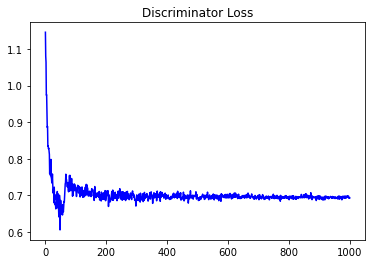

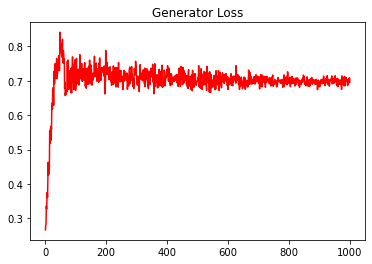

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.8045524837449193


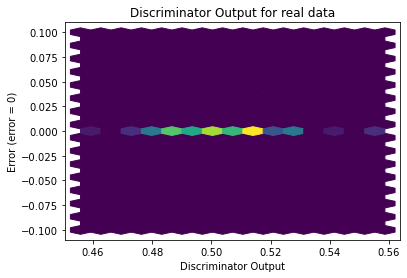

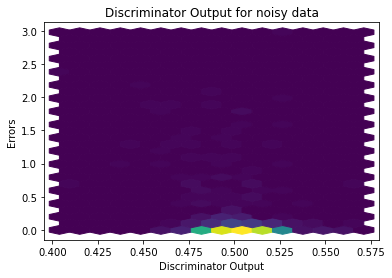

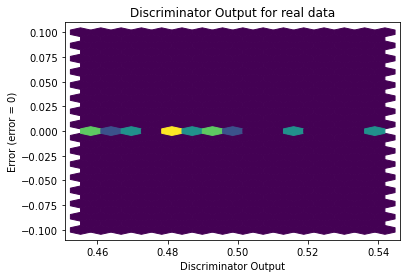

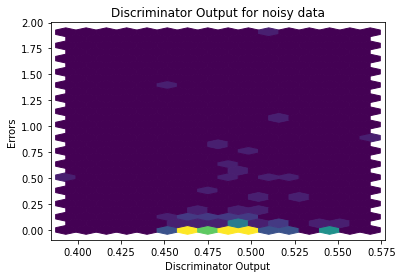

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

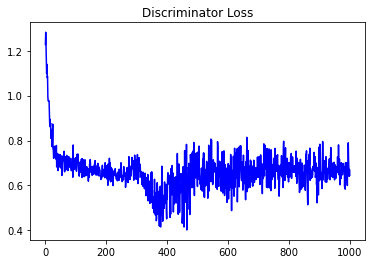

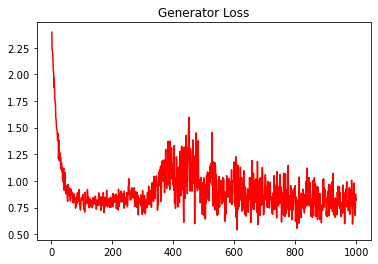

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5575537046417594


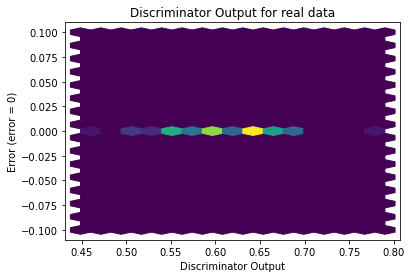

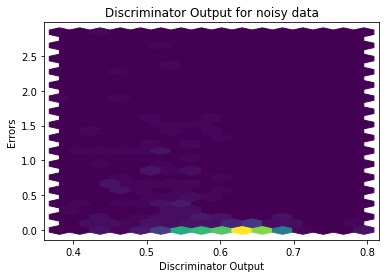

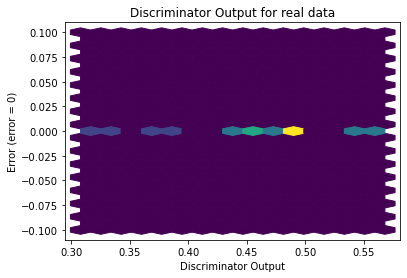

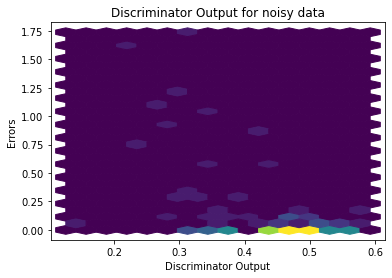

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


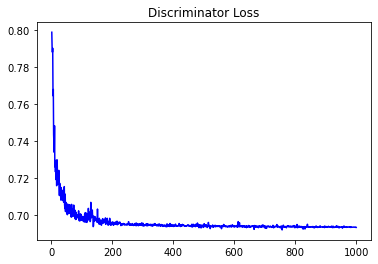

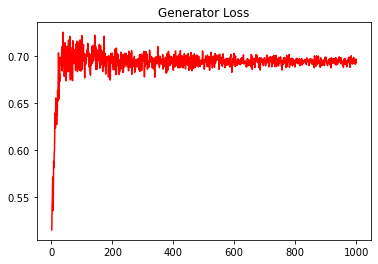

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.30377215761691334


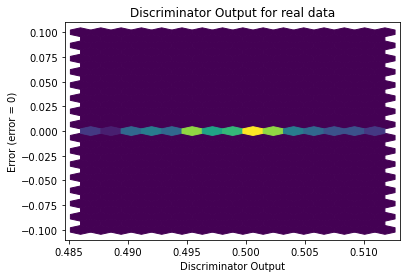

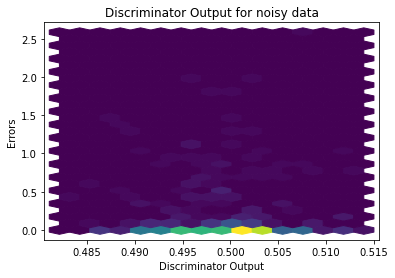

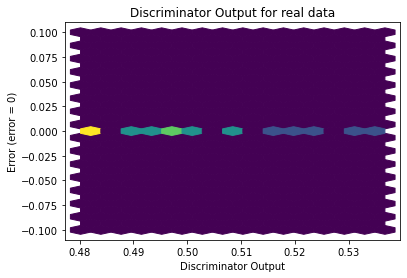

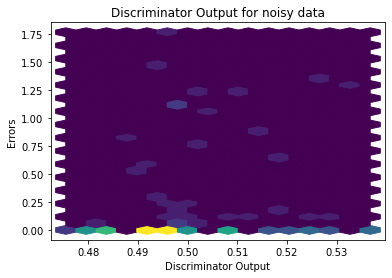

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


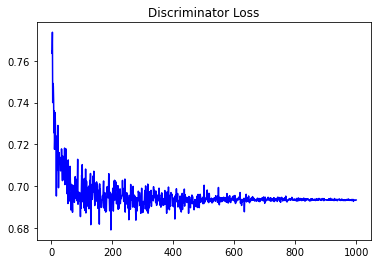

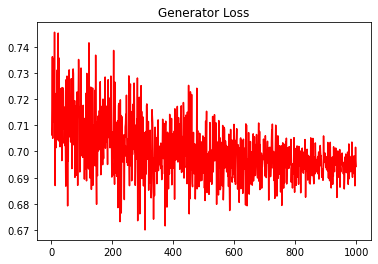

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.27893470972776413


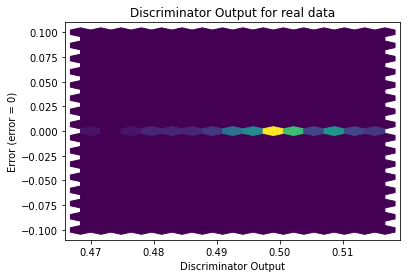

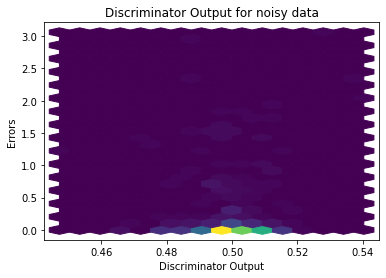

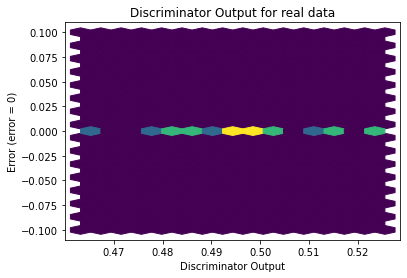

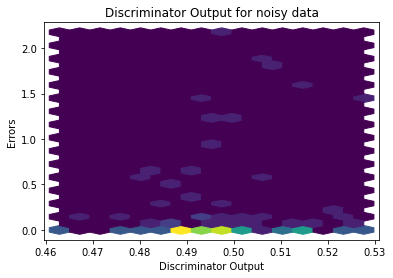

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0805]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0229]], requires_grad=True)
